# The Golden Gloves
## Topic - Using historical data to predict MLB Hall of Fame status.
#### Data Source - https://www.seanlahman.com/baseball-archive/statistics/  
#### Group Hypothesis - Stats affect 
#### Approach to use for analysis - Aggregate stats for each player in regard to batting, fielding, and pitching. Using this data we can attempt to predict hall of fame status using a classificication machine learning method.

In [346]:
# Importing necessary packages
import pandas as pd


In [347]:
# Pandas setup
pd.set_option('display.max_columns', None)


# Hall of Fame Data
Providing example of how two tables could be combined to create a more readble hall of fame table.

In [348]:
# Importing data
people_df = pd.read_csv("Resources/baseballdatabank-master/core/People.csv")
hall_of_fame_df = pd.read_csv("Resources/baseballdatabank-master/core/HallOfFame.csv")

In [349]:
people_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [350]:
hall_of_fame_df.head()

,playerID,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [351]:
# Example merge and selecting necessary columns
hof_merged_df = pd.merge(hall_of_fame_df, people_df)
hof_merged_df = hof_merged_df[['playerID','nameLast', 'nameGiven', 'inducted', 'votes', 'yearID', 'needed']]

In [352]:
temp_df = hof_merged_df.loc[hof_merged_df['votes'] > 170]
temp_df.sort_values('votes', ascending=False)

,playerID,nameLast,nameGiven,inducted,votes,yearID,needed
4082,maddugr01,Maddux,Gregory Alan,Y,555.0,2014,429.0
3879,ripkeca01,Ripken,Calvin Edwin,Y,537.0,2007,409.0
4109,johnsra05,Johnson,Randall David,Y,534.0,2015,412.0
3880,gwynnto01,Gwynn,Anthony Keith,Y,532.0,2007,409.0
4083,glavito02,Glavine,Thomas Michael,Y,525.0,2014,429.0
...,...,...,...,...,...,...,...
2633,foxne01,Fox,Jacob Nelson,N,174.0,1979,324.0
2637,foxne01,Fox,Jacob Nelson,N,173.0,1983,281.0
3690,morrija02,Morris,John Scott,N,172.0,2005,387.0
3799,smithle02,Smith,Lee Arthur,N,171.0,2014,429.0


In [353]:
# Narrowing down dataset to those that barely made/missed HOF status
temp_df = hof_merged_df.loc[(hof_merged_df['votes'] > 140) & (hof_merged_df['votes'] < 200)] 
temp_df.sort_values('needed', ascending=False, inplace=True)
temp_df

C:\Users\alex\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,playerID,nameLast,nameGiven,inducted,votes,yearID,needed
3948,martied01,Martinez,Edgar,N,191.0,2011,436.0
3769,trammal01,Trammell,Alan Stuart,N,141.0,2011,436.0
4049,bondsba01,Bonds,Barry Lamar,N,198.0,2014,429.0
3799,smithle02,Smith,Lee Arthur,N,171.0,2014,429.0
4037,schilcu01,Schilling,Curtis Montague,N,167.0,2014,429.0
...,...,...,...,...,...,...,...
250,chancfr01,Chance,Frank Leroy,N,144.0,1946,NaN
482,gehrich01,Gehringer,Charles Leonard,Y,159.0,1949,NaN
1504,ruffire01,Ruffing,Charles Herbert,N,184.0,1964,NaN
1898,applilu01,Appling,Lucius Benjamin,Y,189.0,1964,NaN


# Career Batting Data
Providing a general exmaple of how batting data could be used.

In [354]:
# Importing data
batting_df = pd.read_csv("Resources/baseballdatabank-master/core/batting.csv")

In [355]:
batting_df.drop(columns=['yearID', 'teamID', 'IBB', 'HBP', 'SH', 'SF', 'stint', 'lgID'], inplace=True)
batting_df.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,GIDP
0,abercda01,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
1,addybo01,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,0.0
2,allisar01,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,1.0
3,allisdo01,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,0.0
4,ansonca01,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,0.0


In [356]:
# Grouping by playerID and yearID, then sorting by home runs by season
career_batting_df = batting_df.groupby(['playerID']).sum()

In [357]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with fielding and pitching
career_batting_df = career_batting_df.add_prefix('b_')

In [358]:
# Sorting dataframe by most home runs
career_batting_df.sort_values('b_HR', ascending=False)

,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP
playerID,,,,,,,,,,,,,
bondsba01,2986,9847,2227,2935,601,77,762,1996.0,514.0,141.0,2558,1539.0,165.0
aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,328.0
ruthba01,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0
rodrial01,2784,10566,2021,3115,548,31,696,2086.0,329.0,76.0,1338,2287.0,261.0
pujolal01,2862,10839,1843,3236,669,16,662,2100.0,114.0,41.0,1331,1304.0,399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
howarch02,44,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0
howarda01,25,36,6,8,1,0,0,1.0,0.0,0.0,1,8.0,0.0
howarea01,1,0,0,0,0,0,0,1.0,0.0,0.0,0,0.0,0.0


In [359]:
# Showing batting stats of specified player
career_batting_df.loc['bondsba01']

b_G       2986.0
b_AB      9847.0
b_R       2227.0
b_H       2935.0
b_2B       601.0
b_3B        77.0
b_HR       762.0
b_RBI     1996.0
b_SB       514.0
b_CS       141.0
b_BB      2558.0
b_SO      1539.0
b_GIDP     165.0
Name: bondsba01, dtype: float64

# Career Fielding Data

In [360]:
# Importing data
fielding_df = pd.read_csv("Resources/baseballdatabank-master/core/Fielding.csv")

In [361]:
# Dropping inconsistent columns
fielding_df.drop(['lgID', 'PB', 'WP', 'SB', 'CS', 'ZR'], axis=1, inplace=True)

# Dropping unnecessary columns
fielding_df.drop(['yearID', 'stint', 'teamID', 'POS'], axis=1, inplace=True)


In [362]:
# Grouping by playerID to get career stats
career_fielding_df = fielding_df.groupby(['playerID']).sum()

In [363]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_fielding_df = career_fielding_df.add_prefix('f_')

In [364]:
career_fielding_df.head()

,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP
playerID,,,,,,,
aardsda01,331,0.0,1011.0,11,29,3.0,2
aaronha01,3020,2977.0,78414.0,7436,429,144.0,218
aaronto01,387,206.0,6472.0,1317,113,22.0,124
aasedo01,448,91.0,3328.0,67,135,13.0,10
abadan01,9,4.0,138.0,37,1,1.0,3


# Career Pitching Data

In [365]:
# Importing data
pitching_df = pd.read_csv("Resources/baseballdatabank-master/core/Pitching.csv")

In [366]:
# Dropping inconsistent columns
pitching_df.drop(['lgID', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'BAOpp'], axis=1, inplace=True)

# Dropping unnecessary columns
pitching_df.drop(['yearID', 'stint', 'teamID'], axis=1, inplace=True)

In [367]:
# Grouping by playerID to get career stats
career_pitching_df = pitching_df.groupby(['playerID']).sum()

In [368]:
# Adding batting prefix to every column to ensure there aren't conflicts when combined with batting and pitching
career_pitching_df = career_pitching_df.add_prefix('p_')

In [369]:
career_pitching_df.head()

,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R
playerID,,,,,,,,,,,,,,,,,,,
aardsda01,16,18,331,0,0,0,69,1011,296,160,41,183,340,46.75,12,1,1475.0,141,169
aasedo01,66,60,448,91,22,5,82,3328,1085,468,89,457,641,45.41,22,3,4730.0,235,503
abadfe01,8,29,384,6,0,0,2,992,309,135,42,116,280,40.81,10,2,1399.0,97,143
abbeybe01,22,40,79,65,52,0,1,1704,686,285,18,192,161,28.07,18,0,2568.0,14,442
abbeych01,0,0,1,0,0,0,0,6,6,1,0,0,0,4.50,1,0,12.0,1,3


# Creating Full Dataset containing:
* Hall of Fame Players (playerID, inductedStatus)
* Career Batting Data
* Career Fielding Data
* Career Pitching Data

In [370]:
# Merging all relevant datasets

# Merging hall of fame and batting dataframes
train_df = pd.merge(hall_of_fame_df, career_batting_df, left_on='playerID', right_on='playerID')

# Appending fielding data
train_df = pd.merge(train_df, career_fielding_df, left_on='playerID', right_on='playerID')

# Appending pitching data
train_df = pd.merge(train_df, career_pitching_df, left_on='playerID', right_on='playerID')

In [371]:
# Cleaning data table
train_df = train_df.drop(['playerID', 'yearID', 'votedBy', 'category', 'needed_note', 'needed', 'ballots', 'votes'], axis=1)
train_df = train_df.dropna()

In [372]:
train_df.head()

,inducted,b_G,b_AB,b_R,b_H,b_2B,b_3B,b_HR,b_RBI,b_SB,b_CS,b_BB,b_SO,b_GIDP,f_G,f_GS,f_InnOuts,f_PO,f_A,f_E,f_DP,p_W,p_L,p_G,p_GS,p_CG,p_SHO,p_SV,p_IPouts,p_H,p_ER,p_HR,p_BB,p_SO,p_ERA,p_WP,p_BK,p_BFP,p_GF,p_R
0,Y,3035,11436,2247,4189,724,295,117,1944.0,896.0,178.0,1249,608.0,0.0,2954,725.0,19266.0,6507,410,278.0,113,0,0,3,0,0,0,1,15,6,2,0,2,0,4.50,0,0,20.0,2,2
1,Y,2503,8398,2174,2873,506,136,714,2217.0,123.0,117.0,2062,1330.0,2.0,2436,0.0,0.0,4787,569,179.0,86,94,46,163,148,107,17,4,3664,974,309,10,441,488,36.80,25,4,5006.0,11,398
2,Y,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5
3,N,2794,10439,1739,3420,643,252,101,1733.0,723.0,15.0,963,735.0,0.0,2777,997.0,50064.0,7940,6782,828.0,963,0,0,2,0,0,0,0,25,7,0,0,6,6,0.00,3,0,37.0,2,5
4,Y,647,1687,151,362,50,12,7,165.0,20.0,1.0,116,218.0,0.0,643,266.0,10032.0,313,1506,57.0,44,373,188,636,552,435,79,29,14366,4219,1135,90,848,2507,47.69,115,8,18943.0,73,1620


# Machine Learning
Using classification to predict inductedStatus based on all stats within dataset.

In [373]:
# Importing required packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [374]:
# assigning data
X = train_df[['inducted']]
y = train_df.drop(['inducted'], axis=1)

# splitting data
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.25, random_state=0)

In [375]:
# Normalizing Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data using standard scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [376]:
# Creating and fitting logistic regression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=10000)
result = logisticRegr.fit(X_train_scaled, y_train.values.ravel())

In [377]:
# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print(score)

0.13432835820895522


In [378]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix

predictions = logisticRegr.predict(X_test)

cm = confusion_matrix(y_test, predictions)

print(cm)

[[ 32 344]
 [  4  22]]


In [379]:
# Display coefficients of values considered by model
import numpy as np
coefficients = pd.concat([pd.DataFrame(y.columns),pd.DataFrame(np.transpose(logisticRegr.coef_))], axis = 1)
coefficients

,0,0
0,b_G,-1.286606
1,b_AB,0.496595
2,b_R,0.176366
3,b_H,0.125010
4,b_2B,0.523769
5,b_3B,0.237394
6,b_HR,-0.285386
7,b_RBI,0.670250
8,b_SB,0.065367
9,b_CS,-0.259511


In [380]:
# Displaying classification report of model
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           N       0.89      0.09      0.16       376
           Y       0.06      0.85      0.11        26

    accuracy                           0.13       402
   macro avg       0.47      0.47      0.13       402
weighted avg       0.84      0.13      0.15       402



# Visualizing Model

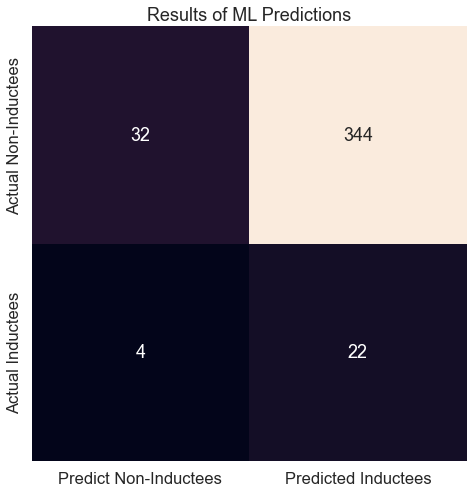

In [381]:
# Creating visual of confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Increasing plot size
sns.set(rc = {'figure.figsize': (15,8)})

# Increasing default text size
sns.set(font_scale=1.5)

# Creating heatmap
sns.heatmap(
    cm,             # data given to map
    annot=True,     # annotating numbers to squares
    square=True,    # making all sectors equal squares
    xticklabels=['Predict Non-Inductees', 'Predicted Inductees'],
    yticklabels=['Actual Non-Inductees', 'Actual Inductees'],
    cbar=False,     # disabling color bar
    fmt='g'         # forcing standard number notation
)

# Adding title to plot
plt.title('Results of ML Predictions')

# Displaying plot
plt.show()